In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25, random_state = 42)

In [8]:
# Model kurumu
rfg = RandomForestRegressor(random_state = 42)

In [9]:
# Model eğitimi
rfg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Tahmin

In [11]:
# Tahmin değerlerimiz y_pred
y_pred = rfg.predict(X_test)

In [13]:
print("Tahmin hatası: ",np.sqrt(mean_squared_error(y_test, y_pred)))

Tahmin hatası:  261.8267872386004


## Model Tuning

Rf'ta önemli olan iki parametre var;
* Fit edilecek ağaç sayısı: "n_estimators"
* Bölünmelerde kullanılacak olan değişken sayısı: "max_features"

Görece daha az önemli olsa da maksimum derinliği ("max_depth") biz burada parametre aramak için kullanıcaz.

In [15]:
rf_params = {"max_depth": list(range(1,10)),
            "max_features": [3,5,10,15],
            "n_estimators" : [100, 200, 500, 1000, 2000]}

In [16]:
rf_model = RandomForestRegressor(random_state = 42)

In [20]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10,
                          n_jobs = -1)
# n_jobs argümanı işlemciyi tam performans ile çalıştırmak için kullanılır

In [21]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [23]:
# En iyi parametreyi bulalım
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 5, 'n_estimators': 100}

In [24]:
# En iyi parametre ile model kurumu
rf_tuned = RandomForestRegressor(max_depth = 7,
                                max_features = 5,
                                n_estimators = 100)

In [25]:
# Model eğitimi
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=5)

In [27]:
y_pred = rf_tuned.predict(X_test)

In [28]:
print("Tahmin hatası: ",np.sqrt(mean_squared_error(y_test, y_pred)))

Tahmin hatası:  259.6375921948747


Değişkenlerin önem düzeylerine erişmek gibi bir ihtiyacımız olduğunu varsayalım bunu şöyle yapardık:

In [31]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

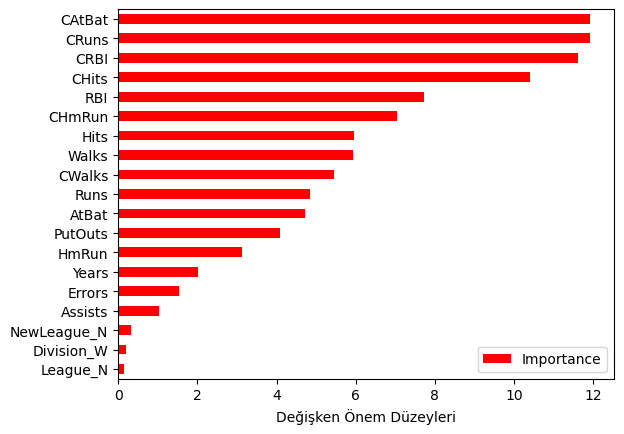

In [38]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel("Değişken Önem Düzeyleri")